In [2]:
import matplotlib.pyplot as plt
from pylab import *
import networkx as nx
import random as rd
import numpy as np

n = 100
p_e = 0.1
p_i = 0.5 # infection probability
p_r = 0.5 # recovery probability

def initialize():
    global g
    g = nx.erdos_renyi_graph(n, p_e)
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    nx.draw(g, vmin = 0, vmax = 1,node_color = [g.nodes[i]['state'] for i in g.nodes], pos = g.pos)
    
def update():
    global g
    new_g = g.copy()
    new_g.pos = g.pos.copy()
    for node in g.nodes:
        if g.nodes[node]['state'] == 0: # if susceptible
            for neighbor in g.neighbors(node):
                if g.nodes[neighbor]['state'] == 1 and g.nodes[node]['state'] != 1: # if neighbor b is infected
                    new_g.nodes[node]['state'] = 1 if random() < p_i else 0
        else: # if infected
            new_g.nodes[node]['state'] = 0 if random() < p_r else 1
            
    g = new_g.copy()
    g.pos = new_g.pos.copy()


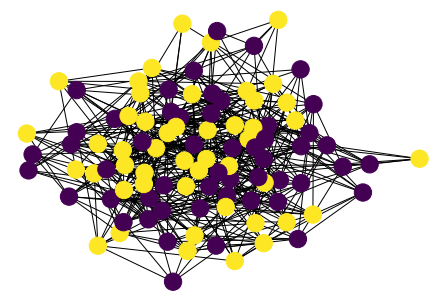

In [3]:

n = 100
p_e = 0.1
p_i = 0.5 # infection probability
p_r = 0.5 # recovery probability

initialize()
for _ in range(100):
    update()
observe()

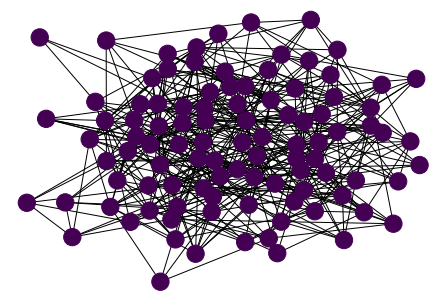

In [4]:
n = 100
p_e = 0.1
p_i = 0.04 # infection probability
p_r = 0.5 # recovery probability

initialize()
for _ in range(100):
    update()
observe()

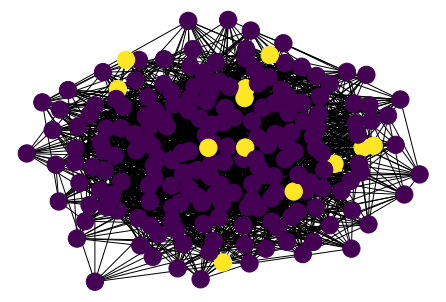

In [5]:
n = 200
p_e = 0.1
p_i = 0.04 # infection probability
p_r = 0.5 # recovery probability

initialize()
for _ in range(100):
    update()
observe()

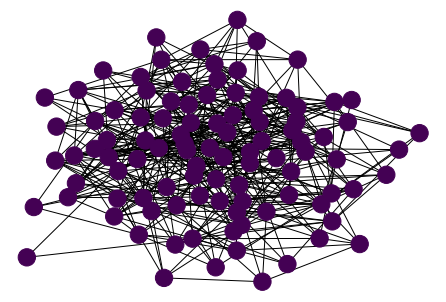

In [6]:
n = 100
p_e = 0.1
p_i = 0.04 # infection probability
p_r = 0.5 # recovery probability

initialize()
for _ in range(100):
    update()
observe()

### Question 2 

In [7]:
g_1 = nx.erdos_renyi_graph(1000,0.04)


In [8]:
# Check if function is returning desired values
degrees = []
for i in list(g_1.edges()):
    for j in i:
        degrees.append(g_1.degree(j))

In [9]:
np.mean(degrees)


40.97534068786502

In [10]:
g_2 = nx.watts_strogatz_graph(1000,40,0.1)


In [12]:
print("# of edges: ", len(list(g_2.edges())))
print("Average degree: ",sum(list(dict(g_2.degree()).values()))/len(list(g_2.nodes())))
print("Average degree of neighbors: ", sum(list(dict(nx.average_neighbor_degree(g_2)).values()))/len(list(g_2.nodes())))
# of edges:  20000

# of edges:  20000
Average degree:  40.0
Average degree of neighbors:  40.09024168358569


In [13]:
g_3 = nx.barabasi_albert_graph(1000,20)
print("# of edges: ", len(list(g_3.edges())))
print("Average degree: ",sum(list(dict(g_3.degree()).values()))/len(list(g_3.nodes())))
print("Average degree of neighbors: ", sum(list(dict(nx.average_neighbor_degree(g_3)).values()))/len(list(g_3.nodes())))

# of edges:  19600
Average degree:  39.2
Average degree of neighbors:  63.63516021318229
